# 2 epochs

Original image saved to predict/original_image.png
Predicted mask saved to predict/predicted_mask.png


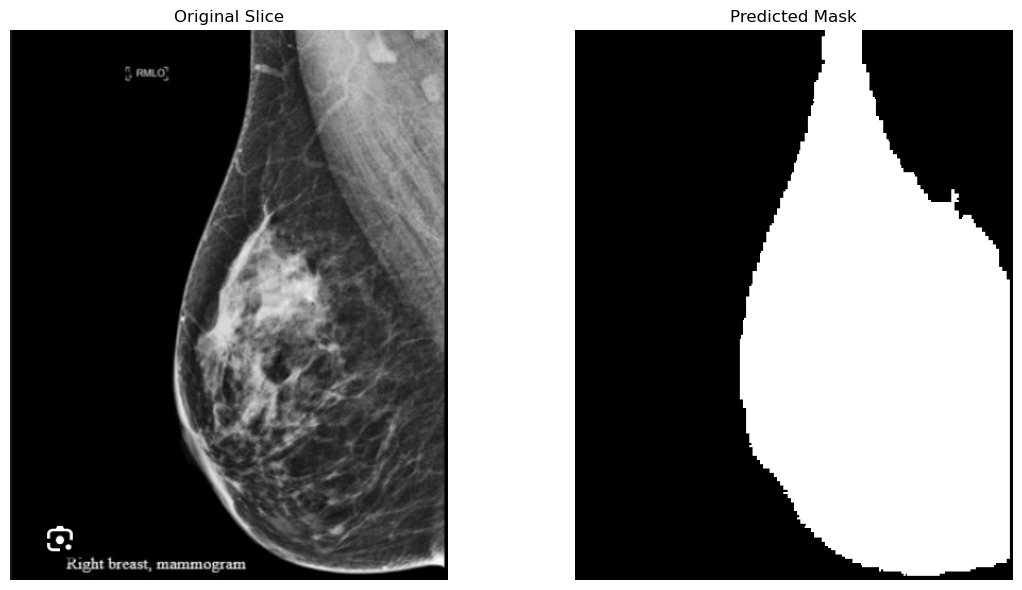

In [ ]:
from models.sam import SamPredictor, sam_model_registry
from models.sam.utils.transforms import ResizeLongestSide
from skimage.measure import label
from models.sam_LoRa import LoRA_Sam
# Scientific computing
import numpy as np
import os
# Pytorch packages
import torch
from torch import nn
import torch.optim as optim
import torchvision
from torchvision import datasets
# Visualization
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
# Others
from torch.utils.data import DataLoader, Subset
from torch.autograd import Variable
import matplotlib.pyplot as plt
import copy
from utils.dataset import Public_dataset
import torch.nn.functional as F
from torch.nn.functional import one_hot
from pathlib import Path
from tqdm import tqdm
from utils.losses import DiceLoss
from utils.dsc import dice_coeff
import cv2
import monai
from utils.utils import vis_image, inverse_normalize, torch_percentile
from argparse import Namespace
import cfg
import PIL
import torchio as tio
import json

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

arch = "vit_b"  # Change this value as needed
finetune_type = "adapter"
dataset_name = "Breast"  # Assuming you set this if it's dynamic

checkpoint_dir = "checkpoints"
args_path = os.path.join(checkpoint_dir, "args.json")

# Reading the args from the json file
with open(args_path, 'r') as f:
    args_dict = json.load(f)

# Converting dictionary to Namespace
args = Namespace(**args_dict)

# Load the trained model
sam_fine_tune = sam_model_registry[args.arch](args, checkpoint=os.path.join(args.dir_checkpoint, 'checkpoint_best.pth'), num_classes=args.num_cls)
sam_fine_tune = sam_fine_tune.to('cuda').eval()

def evaluate_1_slice(image_path, model):
    """
    Evaluates a single image slice using the provided model.

    Parameters:
    - image_path: Path to the image slice file.
    - model: The model used for evaluation.

    Returns:
    - ori_img: The original image after normalization.
    - pred: The prediction from the model.
    - Pil_img: The PIL image of the original slice.
    """
    # Load the image
    img = Image.open(image_path).convert('RGB')
    Pil_img = img.copy()

    # Resize the image to 1024x1024
    img = transforms.Resize((1024, 1024))(img)

    # Transform the image to a tensor and normalize
    transform_img = transforms.Compose([
        transforms.ToTensor(),
    ])
    img = transform_img(img)
    imgs = torch.unsqueeze(transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(img), 0).cuda()

    # Perform model inference without gradient calculation
    with torch.no_grad():
        # Get image embeddings from the image encoder
        img_emb = model.image_encoder(imgs)

        # Get sparse and dense embeddings from the prompt encoder
        sparse_emb, dense_emb = model.prompt_encoder(
            points=None,
            boxes=None,
            masks=None,
        )

        # Get the prediction from the mask decoder
        pred, _ = model.mask_decoder(
            image_embeddings=img_emb,
            image_pe=model.prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_emb,
            dense_prompt_embeddings=dense_emb,
            multimask_output=True,
        )

        # Get the most likely prediction
        pred = pred.argmax(dim=1)

    # Get the original image after normalization
    ori_img = inverse_normalize(imgs.cpu()[0])

    return ori_img, pred, Pil_img

# Define paths
image_path = 'R2.png'  # Replace with the path to your image slice
output_dir = 'predict'  # Directory to save predictions

# Create the output directory if it doesn't exist
Path(output_dir).mkdir(parents=True, exist_ok=True)

# Evaluate the image slice
ori_img, pred_1, Pil_img1 = evaluate_1_slice(image_path, sam_fine_tune)

# Convert the predicted mask to a PIL image
mask_pred_1 = ((pred_1).cpu()).float()
pil_mask1 = Image.fromarray(np.array(mask_pred_1[0], dtype=np.uint8), 'L').resize(Pil_img1.size, resample=Image.NEAREST)

# Save the original image and the predicted mask as PNG
ori_img_filename = os.path.join(output_dir, 'original_image.png')
mask_img_filename = os.path.join(output_dir, 'predicted_mask.png')

Pil_img1.save(ori_img_filename)
pil_mask1.save(mask_img_filename)

print(f"Original image saved to {ori_img_filename}")
print(f"Predicted mask saved to {mask_img_filename}")

# Load and display the original image and the predicted mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original slice
ori_img_display = np.array(Pil_img1)
axes[0].imshow(ori_img_display)
axes[0].set_title("Original Slice")
axes[0].axis('off')

# Display the predicted mask
mask_display = np.array(pil_mask1)
axes[1].imshow(mask_display, cmap='gray')
axes[1].set_title("Predicted Mask")
axes[1].axis('off')

plt.tight_layout()
plt.show()


# Epoch 54

/home/jabonsote/miniconda3/envs/dl2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jabonsote/miniconda3/envs/dl2/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1712609048481/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:84.)
  return F.conv2d(input, weight, bias, self.stride,


Original image saved to predict/original_image.png
Predicted mask saved to predict/predicted_mask.png


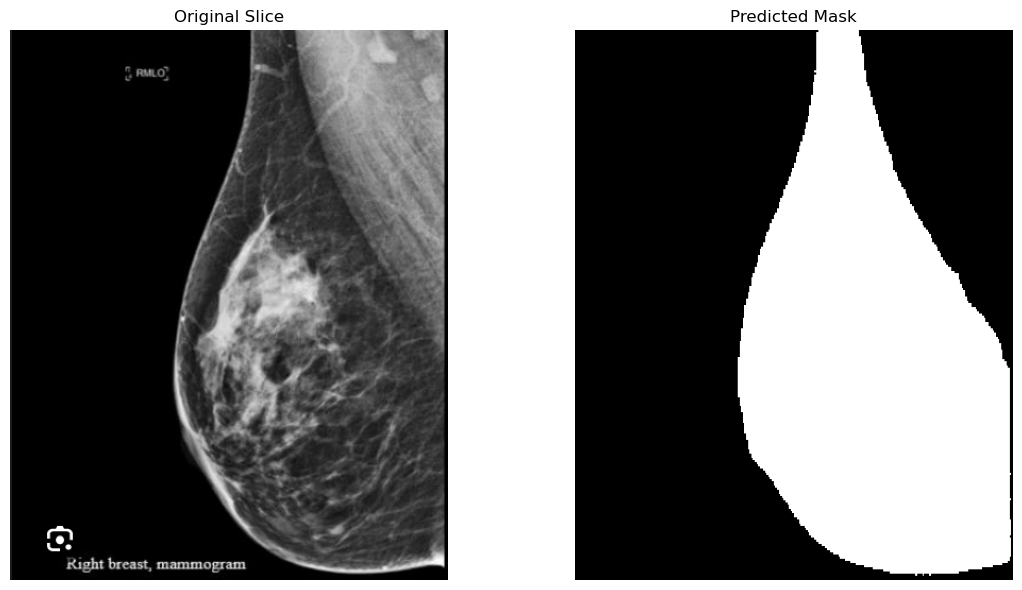

In [ ]:
from models.sam import SamPredictor, sam_model_registry
from models.sam.utils.transforms import ResizeLongestSide
from skimage.measure import label
from models.sam_LoRa import LoRA_Sam
# Scientific computing
import numpy as np
import os
# Pytorch packages
import torch
from torch import nn
import torch.optim as optim
import torchvision
from torchvision import datasets
# Visualization
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
# Others
from torch.utils.data import DataLoader, Subset
from torch.autograd import Variable
import matplotlib.pyplot as plt
import copy
from utils.dataset import Public_dataset
import torch.nn.functional as F
from torch.nn.functional import one_hot
from pathlib import Path
from tqdm import tqdm
from utils.losses import DiceLoss
from utils.dsc import dice_coeff
import cv2
import monai
from utils.utils import vis_image, inverse_normalize, torch_percentile
from argparse import Namespace
import cfg
import PIL
import torchio as tio
import json

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

arch = "vit_b"  # Change this value as needed
finetune_type = "adapter"
dataset_name = "Breast"  # Assuming you set this if it's dynamic

checkpoint_dir = "checkpoints"
args_path = os.path.join(checkpoint_dir, "args.json")

# Reading the args from the json file
with open(args_path, 'r') as f:
    args_dict = json.load(f)

# Converting dictionary to Namespace
args = Namespace(**args_dict)

# Load the trained model
sam_fine_tune = sam_model_registry[args.arch](args, checkpoint=os.path.join(args.dir_checkpoint, 'checkpoint_best.pth'), num_classes=args.num_cls)
sam_fine_tune = sam_fine_tune.to('cuda').eval()

def evaluate_1_slice(image_path, model):
    """
    Evaluates a single image slice using the provided model.

    Parameters:
    - image_path: Path to the image slice file.
    - model: The model used for evaluation.

    Returns:
    - ori_img: The original image after normalization.
    - pred: The prediction from the model.
    - Pil_img: The PIL image of the original slice.
    """
    # Load the image
    img = Image.open(image_path).convert('RGB')
    Pil_img = img.copy()

    # Resize the image to 1024x1024
    img = transforms.Resize((1024, 1024))(img)

    # Transform the image to a tensor and normalize
    transform_img = transforms.Compose([
        transforms.ToTensor(),
    ])
    img = transform_img(img)
    imgs = torch.unsqueeze(transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(img), 0).cuda()

    # Perform model inference without gradient calculation
    with torch.no_grad():
        # Get image embeddings from the image encoder
        img_emb = model.image_encoder(imgs)

        # Get sparse and dense embeddings from the prompt encoder
        sparse_emb, dense_emb = model.prompt_encoder(
            points=None,
            boxes=None,
            masks=None,
        )

        # Get the prediction from the mask decoder
        pred, _ = model.mask_decoder(
            image_embeddings=img_emb,
            image_pe=model.prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_emb,
            dense_prompt_embeddings=dense_emb,
            multimask_output=True,
        )

        # Get the most likely prediction
        pred = pred.argmax(dim=1)

    # Get the original image after normalization
    ori_img = inverse_normalize(imgs.cpu()[0])

    return ori_img, pred, Pil_img

# Define paths
image_path = 'R2.png'  # Replace with the path to your image slice
output_dir = 'predict'  # Directory to save predictions

# Create the output directory if it doesn't exist
Path(output_dir).mkdir(parents=True, exist_ok=True)

# Evaluate the image slice
ori_img, pred_1, Pil_img1 = evaluate_1_slice(image_path, sam_fine_tune)

# Convert the predicted mask to a PIL image
mask_pred_1 = ((pred_1).cpu()).float()
pil_mask1 = Image.fromarray(np.array(mask_pred_1[0], dtype=np.uint8), 'L').resize(Pil_img1.size, resample=Image.NEAREST)

# Save the original image and the predicted mask as PNG
ori_img_filename = os.path.join(output_dir, 'original_image.png')
mask_img_filename = os.path.join(output_dir, 'predicted_mask.png')

Pil_img1.save(ori_img_filename)
pil_mask1.save(mask_img_filename)

print(f"Original image saved to {ori_img_filename}")
print(f"Predicted mask saved to {mask_img_filename}")

# Load and display the original image and the predicted mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original slice
ori_img_display = np.array(Pil_img1)
axes[0].imshow(ori_img_display)
axes[0].set_title("Original Slice")
axes[0].axis('off')

# Display the predicted mask
mask_display = np.array(pil_mask1)
axes[1].imshow(mask_display, cmap='gray')
axes[1].set_title("Predicted Mask")
axes[1].axis('off')

plt.tight_layout()
plt.show()


Original image saved to predict/original_image.png
Predicted mask saved to predict/predicted_mask.png


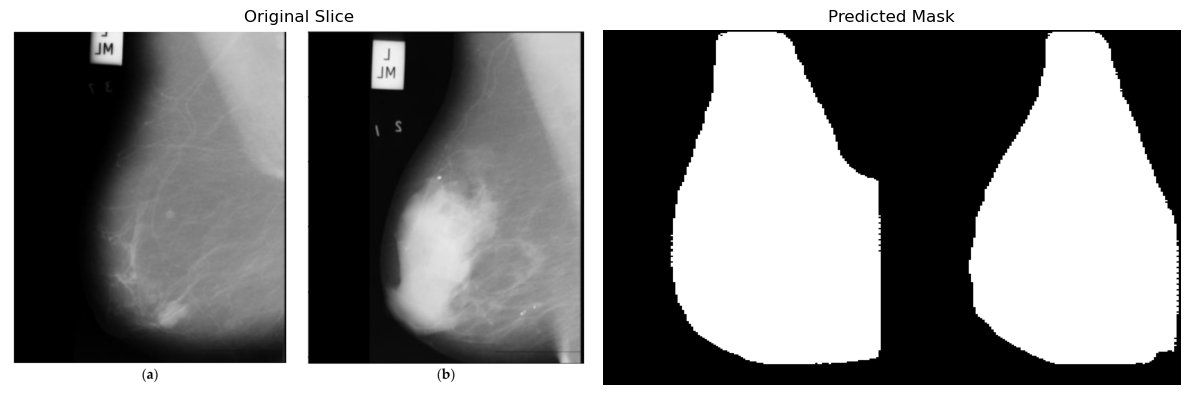

In [ ]:
from models.sam import SamPredictor, sam_model_registry
from models.sam.utils.transforms import ResizeLongestSide
from skimage.measure import label
from models.sam_LoRa import LoRA_Sam
# Scientific computing
import numpy as np
import os
# Pytorch packages
import torch
from torch import nn
import torch.optim as optim
import torchvision
from torchvision import datasets
# Visualization
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
# Others
from torch.utils.data import DataLoader, Subset
from torch.autograd import Variable
import matplotlib.pyplot as plt
import copy
from utils.dataset import Public_dataset
import torch.nn.functional as F
from torch.nn.functional import one_hot
from pathlib import Path
from tqdm import tqdm
from utils.losses import DiceLoss
from utils.dsc import dice_coeff
import cv2
import monai
from utils.utils import vis_image, inverse_normalize, torch_percentile
from argparse import Namespace
import cfg
import PIL
import torchio as tio
import json

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

arch = "vit_b"  # Change this value as needed
finetune_type = "adapter"
dataset_name = "Breast"  # Assuming you set this if it's dynamic

checkpoint_dir = "checkpoints"
args_path = os.path.join(checkpoint_dir, "args.json")

# Reading the args from the json file
with open(args_path, 'r') as f:
    args_dict = json.load(f)

# Converting dictionary to Namespace
args = Namespace(**args_dict)

# Load the trained model
sam_fine_tune = sam_model_registry[args.arch](args, checkpoint=os.path.join(args.dir_checkpoint, 'checkpoint_best.pth'), num_classes=args.num_cls)
sam_fine_tune = sam_fine_tune.to('cuda').eval()

def evaluate_1_slice(image_path, model):
    """
    Evaluates a single image slice using the provided model.

    Parameters:
    - image_path: Path to the image slice file.
    - model: The model used for evaluation.

    Returns:
    - ori_img: The original image after normalization.
    - pred: The prediction from the model.
    - Pil_img: The PIL image of the original slice.
    """
    # Load the image
    img = Image.open(image_path).convert('RGB')
    Pil_img = img.copy()

    # Resize the image to 1024x1024
    img = transforms.Resize((1024, 1024))(img)

    # Transform the image to a tensor and normalize
    transform_img = transforms.Compose([
        transforms.ToTensor(),
    ])
    img = transform_img(img)
    imgs = torch.unsqueeze(transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(img), 0).cuda()

    # Perform model inference without gradient calculation
    with torch.no_grad():
        # Get image embeddings from the image encoder
        img_emb = model.image_encoder(imgs)

        # Get sparse and dense embeddings from the prompt encoder
        sparse_emb, dense_emb = model.prompt_encoder(
            points=None,
            boxes=None,
            masks=None,
        )

        # Get the prediction from the mask decoder
        pred, _ = model.mask_decoder(
            image_embeddings=img_emb,
            image_pe=model.prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_emb,
            dense_prompt_embeddings=dense_emb,
            multimask_output=True,
        )

        # Get the most likely prediction
        pred = pred.argmax(dim=1)

    # Get the original image after normalization
    ori_img = inverse_normalize(imgs.cpu()[0])

    return ori_img, pred, Pil_img

# Define paths
image_path = 'test.png'  # Replace with the path to your image slice
output_dir = 'predict'  # Directory to save predictions

# Create the output directory if it doesn't exist
Path(output_dir).mkdir(parents=True, exist_ok=True)

# Evaluate the image slice
ori_img, pred_1, Pil_img1 = evaluate_1_slice(image_path, sam_fine_tune)

# Convert the predicted mask to a PIL image
mask_pred_1 = ((pred_1).cpu()).float()
pil_mask1 = Image.fromarray(np.array(mask_pred_1[0], dtype=np.uint8), 'L').resize(Pil_img1.size, resample=Image.NEAREST)

# Save the original image and the predicted mask as PNG
ori_img_filename = os.path.join(output_dir, 'original_image.png')
mask_img_filename = os.path.join(output_dir, 'predicted_mask.png')

Pil_img1.save(ori_img_filename)
pil_mask1.save(mask_img_filename)

print(f"Original image saved to {ori_img_filename}")
print(f"Predicted mask saved to {mask_img_filename}")

# Load and display the original image and the predicted mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original slice
ori_img_display = np.array(Pil_img1)
axes[0].imshow(ori_img_display)
axes[0].set_title("Original Slice")
axes[0].axis('off')

# Display the predicted mask
mask_display = np.array(pil_mask1)
axes[1].imshow(mask_display, cmap='gray')
axes[1].set_title("Predicted Mask")
axes[1].axis('off')

plt.tight_layout()
plt.show()


Original image saved to predict/original_image.png
Predicted mask saved to predict/predicted_mask.png


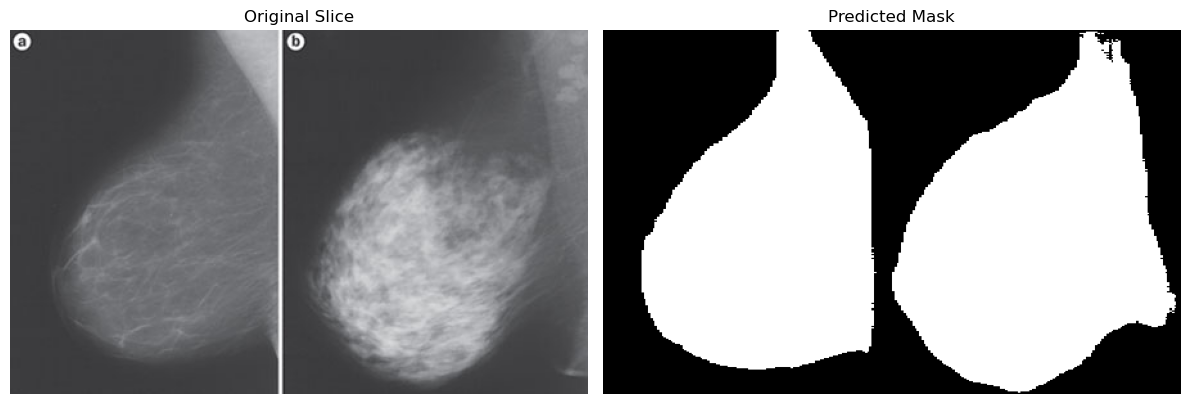

In [ ]:
from models.sam import SamPredictor, sam_model_registry
from models.sam.utils.transforms import ResizeLongestSide
from skimage.measure import label
from models.sam_LoRa import LoRA_Sam
# Scientific computing
import numpy as np
import os
# Pytorch packages
import torch
from torch import nn
import torch.optim as optim
import torchvision
from torchvision import datasets
# Visualization
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
# Others
from torch.utils.data import DataLoader, Subset
from torch.autograd import Variable
import matplotlib.pyplot as plt
import copy
from utils.dataset import Public_dataset
import torch.nn.functional as F
from torch.nn.functional import one_hot
from pathlib import Path
from tqdm import tqdm
from utils.losses import DiceLoss
from utils.dsc import dice_coeff
import cv2
import monai
from utils.utils import vis_image, inverse_normalize, torch_percentile
from argparse import Namespace
import cfg
import PIL
import torchio as tio
import json

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

arch = "vit_b"  # Change this value as needed
finetune_type = "adapter"
dataset_name = "Breast"  # Assuming you set this if it's dynamic

checkpoint_dir = "checkpoints"
args_path = os.path.join(checkpoint_dir, "args.json")

# Reading the args from the json file
with open(args_path, 'r') as f:
    args_dict = json.load(f)

# Converting dictionary to Namespace
args = Namespace(**args_dict)

# Load the trained model
sam_fine_tune = sam_model_registry[args.arch](args, checkpoint=os.path.join(args.dir_checkpoint, 'checkpoint_best.pth'), num_classes=args.num_cls)
sam_fine_tune = sam_fine_tune.to('cuda').eval()

def evaluate_1_slice(image_path, model):
    """
    Evaluates a single image slice using the provided model.

    Parameters:
    - image_path: Path to the image slice file.
    - model: The model used for evaluation.

    Returns:
    - ori_img: The original image after normalization.
    - pred: The prediction from the model.
    - Pil_img: The PIL image of the original slice.
    """
    # Load the image
    img = Image.open(image_path).convert('RGB')
    Pil_img = img.copy()

    # Resize the image to 1024x1024
    img = transforms.Resize((1024, 1024))(img)

    # Transform the image to a tensor and normalize
    transform_img = transforms.Compose([
        transforms.ToTensor(),
    ])
    img = transform_img(img)
    imgs = torch.unsqueeze(transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(img), 0).cuda()

    # Perform model inference without gradient calculation
    with torch.no_grad():
        # Get image embeddings from the image encoder
        img_emb = model.image_encoder(imgs)

        # Get sparse and dense embeddings from the prompt encoder
        sparse_emb, dense_emb = model.prompt_encoder(
            points=None,
            boxes=None,
            masks=None,
        )

        # Get the prediction from the mask decoder
        pred, _ = model.mask_decoder(
            image_embeddings=img_emb,
            image_pe=model.prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_emb,
            dense_prompt_embeddings=dense_emb,
            multimask_output=True,
        )

        # Get the most likely prediction
        pred = pred.argmax(dim=1)

    # Get the original image after normalization
    ori_img = inverse_normalize(imgs.cpu()[0])

    return ori_img, pred, Pil_img

# Define paths
image_path = 'TEST6.jpeg'  # Replace with the path to your image slice
output_dir = 'predict'  # Directory to save predictions

# Create the output directory if it doesn't exist
Path(output_dir).mkdir(parents=True, exist_ok=True)

# Evaluate the image slice
ori_img, pred_1, Pil_img1 = evaluate_1_slice(image_path, sam_fine_tune)

# Convert the predicted mask to a PIL image
mask_pred_1 = ((pred_1).cpu()).float()
pil_mask1 = Image.fromarray(np.array(mask_pred_1[0], dtype=np.uint8), 'L').resize(Pil_img1.size, resample=Image.NEAREST)

# Save the original image and the predicted mask as PNG
ori_img_filename = os.path.join(output_dir, 'original_image.png')
mask_img_filename = os.path.join(output_dir, 'predicted_mask.png')

Pil_img1.save(ori_img_filename)
pil_mask1.save(mask_img_filename)

print(f"Original image saved to {ori_img_filename}")
print(f"Predicted mask saved to {mask_img_filename}")

# Load and display the original image and the predicted mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original slice
ori_img_display = np.array(Pil_img1)
axes[0].imshow(ori_img_display)
axes[0].set_title("Original Slice")
axes[0].axis('off')

# Display the predicted mask
mask_display = np.array(pil_mask1)
axes[1].imshow(mask_display, cmap='gray')
axes[1].set_title("Predicted Mask")
axes[1].axis('off')

plt.tight_layout()
plt.show()


Original image saved to predict/original_image.png
Predicted mask saved to predict/predicted_mask.png


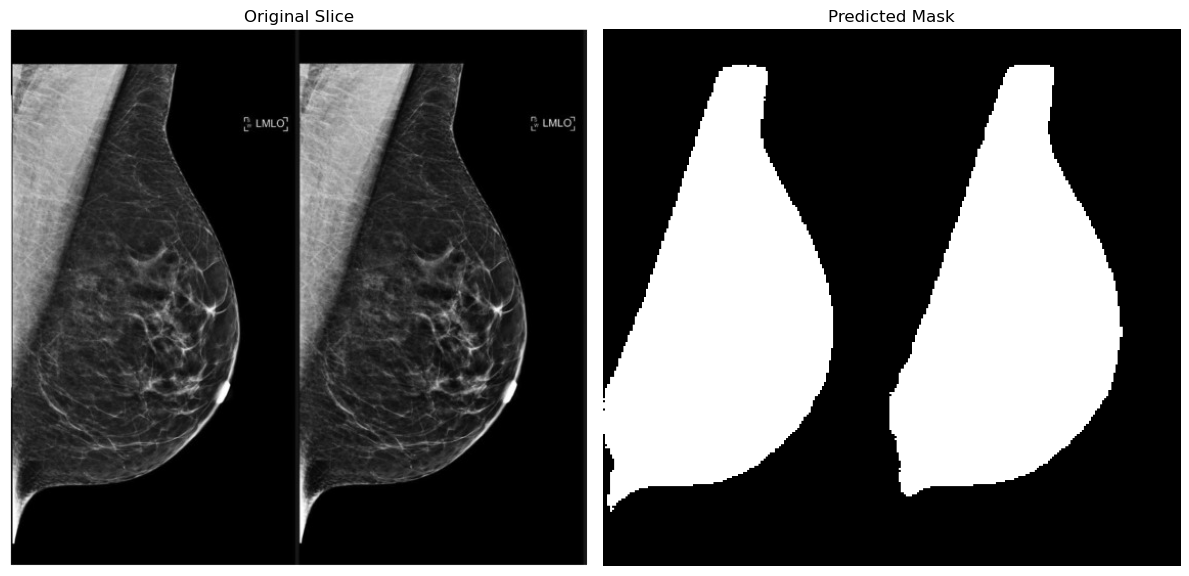

In [ ]:
# Define paths
image_path = 'TEST3.jpg'  # Replace with the path to your image slice
output_dir = 'predict'  # Directory to save predictions

# Create the output directory if it doesn't exist
Path(output_dir).mkdir(parents=True, exist_ok=True)

# Evaluate the image slice
ori_img, pred_1, Pil_img1 = evaluate_1_slice(image_path, sam_fine_tune)

# Convert the predicted mask to a PIL image
mask_pred_1 = ((pred_1).cpu()).float()
pil_mask1 = Image.fromarray(np.array(mask_pred_1[0], dtype=np.uint8), 'L').resize(Pil_img1.size, resample=Image.NEAREST)

# Save the original image and the predicted mask as PNG
ori_img_filename = os.path.join(output_dir, 'original_image.png')
mask_img_filename = os.path.join(output_dir, 'predicted_mask.png')

Pil_img1.save(ori_img_filename)
pil_mask1.save(mask_img_filename)

print(f"Original image saved to {ori_img_filename}")
print(f"Predicted mask saved to {mask_img_filename}")

# Load and display the original image and the predicted mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original slice
ori_img_display = np.array(Pil_img1)
axes[0].imshow(ori_img_display)
axes[0].set_title("Original Slice")
axes[0].axis('off')

# Display the predicted mask
mask_display = np.array(pil_mask1)
axes[1].imshow(mask_display, cmap='gray')
axes[1].set_title("Predicted Mask")
axes[1].axis('off')

plt.tight_layout()
plt.show()


Original image saved to predict/original_image.png
Predicted mask saved to predict/predicted_mask.png


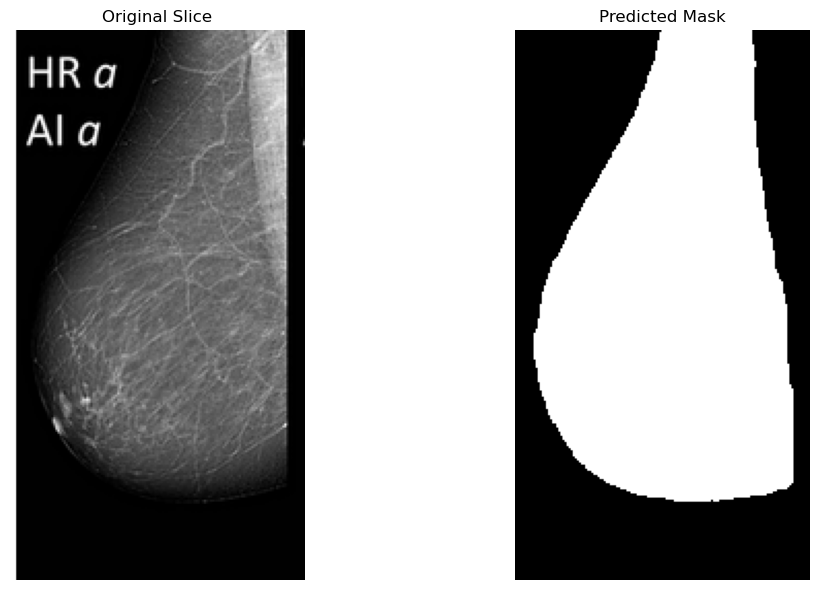

In [ ]:
# Define paths
image_path = 's.png'  # Replace with the path to your image slice
output_dir = 'predict'  # Directory to save predictions

# Create the output directory if it doesn't exist
Path(output_dir).mkdir(parents=True, exist_ok=True)

# Evaluate the image slice
ori_img, pred_1, Pil_img1 = evaluate_1_slice(image_path, sam_fine_tune)

# Convert the predicted mask to a PIL image
mask_pred_1 = ((pred_1).cpu()).float()
pil_mask1 = Image.fromarray(np.array(mask_pred_1[0], dtype=np.uint8), 'L').resize(Pil_img1.size, resample=Image.NEAREST)

# Save the original image and the predicted mask as PNG
ori_img_filename = os.path.join(output_dir, 'original_image.png')
mask_img_filename = os.path.join(output_dir, 'predicted_mask.png')

Pil_img1.save(ori_img_filename)
pil_mask1.save(mask_img_filename)

print(f"Original image saved to {ori_img_filename}")
print(f"Predicted mask saved to {mask_img_filename}")

# Load and display the original image and the predicted mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original slice
ori_img_display = np.array(Pil_img1)
axes[0].imshow(ori_img_display)
axes[0].set_title("Original Slice")
axes[0].axis('off')

# Display the predicted mask
mask_display = np.array(pil_mask1)
axes[1].imshow(mask_display, cmap='gray')
axes[1].set_title("Predicted Mask")
axes[1].axis('off')

plt.tight_layout()
plt.show()


Blended image saved to predict/blended_image.png


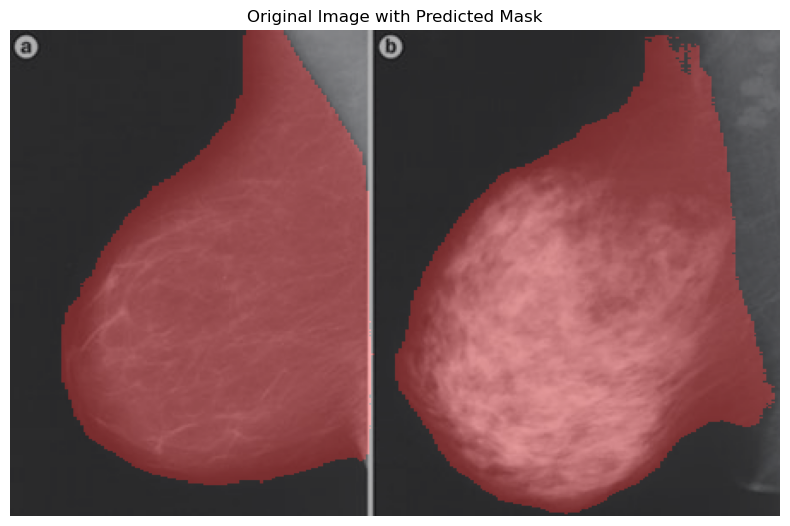

In [ ]:
from models.sam import SamPredictor, sam_model_registry
from models.sam.utils.transforms import ResizeLongestSide
from skimage.measure import label
from models.sam_LoRa import LoRA_Sam
# Scientific computing
import numpy as np
import os
# Pytorch packages
import torch
from torch import nn
import torch.optim as optim
import torchvision
from torchvision import datasets
# Visualization
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
# Others
from torch.utils.data import DataLoader, Subset
from torch.autograd import Variable
import matplotlib.pyplot as plt
import copy
from utils.dataset import Public_dataset
import torch.nn.functional as F
from torch.nn.functional import one_hot
from pathlib import Path
from tqdm import tqdm
from utils.losses import DiceLoss
from utils.dsc import dice_coeff
import cv2
import monai
from utils.utils import vis_image, inverse_normalize, torch_percentile
from argparse import Namespace
import cfg
import PIL
import torchio as tio
import json

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

arch = "vit_b"  # Change this value as needed
finetune_type = "adapter"
dataset_name = "Breast"  # Assuming you set this if it's dynamic

checkpoint_dir = "checkpoints"
args_path = os.path.join(checkpoint_dir, "args.json")

# Reading the args from the json file
with open(args_path, 'r') as f:
    args_dict = json.load(f)

# Converting dictionary to Namespace
args = Namespace(**args_dict)

# Load the trained model
sam_fine_tune = sam_model_registry[args.arch](args, checkpoint=os.path.join(args.dir_checkpoint, 'checkpoint_best.pth'), num_classes=args.num_cls)
sam_fine_tune = sam_fine_tune.to('cuda').eval()

def evaluate_1_slice(image_path, model):
    """
    Evaluates a single image slice using the provided model.

    Parameters:
    - image_path: Path to the image slice file.
    - model: The model used for evaluation.

    Returns:
    - ori_img: The original image after normalization.
    - pred: The prediction from the model.
    - Pil_img: The PIL image of the original slice.
    """
    # Load the image
    img = Image.open(image_path).convert('RGB')
    Pil_img = img.copy()

    # Resize the image to 1024x1024
    img = transforms.Resize((1024, 1024))(img)

    # Transform the image to a tensor and normalize
    transform_img = transforms.Compose([
        transforms.ToTensor(),
    ])
    img = transform_img(img)
    imgs = torch.unsqueeze(transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(img), 0).cuda()

    # Perform model inference without gradient calculation
    with torch.no_grad():
        # Get image embeddings from the image encoder
        img_emb = model.image_encoder(imgs)

        # Get sparse and dense embeddings from the prompt encoder
        sparse_emb, dense_emb = model.prompt_encoder(
            points=None,
            boxes=None,
            masks=None,
        )

        # Get the prediction from the mask decoder
        pred, _ = model.mask_decoder(
            image_embeddings=img_emb,
            image_pe=model.prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_emb,
            dense_prompt_embeddings=dense_emb,
            multimask_output=True,
        )

        # Get the most likely prediction
        pred = pred.argmax(dim=1)

    # Get the original image after normalization
    ori_img = inverse_normalize(imgs.cpu()[0])

    return ori_img, pred, Pil_img

# Define paths
image_path = 'TEST6.jpeg'  # Replace with the path to your image slice
output_dir = 'predict'  # Directory to save predictions

# Create the output directory if it doesn't exist
Path(output_dir).mkdir(parents=True, exist_ok=True)

# Evaluate the image slice
ori_img, pred_1, Pil_img1 = evaluate_1_slice(image_path, sam_fine_tune)

# Convert the predicted mask to a PIL image
mask_pred_1 = ((pred_1).cpu()).float()
mask_pred_resized = cv2.resize(np.array(mask_pred_1[0]), (Pil_img1.size[0], Pil_img1.size[1]), interpolation=cv2.INTER_NEAREST)

# Convert mask to RGB format for visualization
mask_rgb = np.zeros((mask_pred_resized.shape[0], mask_pred_resized.shape[1], 3), dtype=np.uint8)
mask_rgb[mask_pred_resized == 1] = [255, 0, 0]  # Red color for mask

# Convert PIL image to numpy array
ori_img_np = np.array(Pil_img1)

# Blend the original image and the mask
blended_img = cv2.addWeighted(ori_img_np, 0.7, mask_rgb, 0.3, 0)

# Save the blended image
blended_img_filename = os.path.join(output_dir, 'blended_image.png')
cv2.imwrite(blended_img_filename, cv2.cvtColor(blended_img, cv2.COLOR_RGB2BGR))

print(f"Blended image saved to {blended_img_filename}")

# Load and display the blended image
fig, axes = plt.subplots(1, 1, figsize=(8, 8))

# Display the blended image
axes.imshow(blended_img)
axes.set_title("Original Image with Predicted Mask")
axes.axis('off')

plt.tight_layout()
plt.show()


# Med sam

/home/jabonsote/miniconda3/envs/dl2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jabonsote/miniconda3/envs/dl2/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1712609048481/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:84.)
  return F.conv2d(input, weight, bias, self.stride,


Original image saved to predict/original_image.png
Predicted mask saved to predict/predicted_mask.png


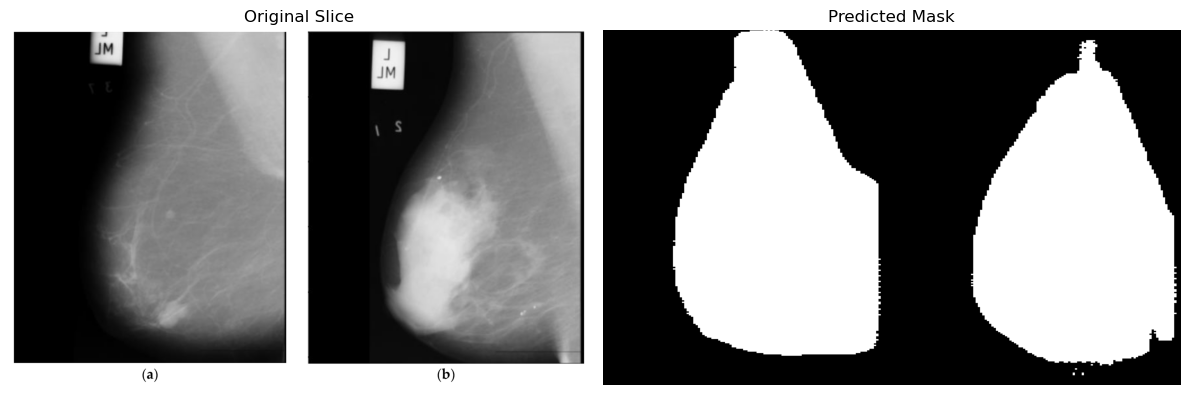

In [ ]:
from models.sam import SamPredictor, sam_model_registry
from models.sam.utils.transforms import ResizeLongestSide
from skimage.measure import label
from models.sam_LoRa import LoRA_Sam
# Scientific computing
import numpy as np
import os
# Pytorch packages
import torch
from torch import nn
import torch.optim as optim
import torchvision
from torchvision import datasets
# Visualization
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
# Others
from torch.utils.data import DataLoader, Subset
from torch.autograd import Variable
import matplotlib.pyplot as plt
import copy
from utils.dataset import Public_dataset
import torch.nn.functional as F
from torch.nn.functional import one_hot
from pathlib import Path
from tqdm import tqdm
from utils.losses import DiceLoss
from utils.dsc import dice_coeff
import cv2
import monai
from utils.utils import vis_image, inverse_normalize, torch_percentile
from argparse import Namespace
import cfg
import PIL
import torchio as tio
import json

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

arch = "vit_b"  # Change this value as needed
finetune_type = "adapter"
dataset_name = "Breast"  # Assuming you set this if it's dynamic

checkpoint_dir = "checkpoints"
args_path = os.path.join(checkpoint_dir, "args.json")

# Reading the args from the json file
with open(args_path, 'r') as f:
    args_dict = json.load(f)

# Converting dictionary to Namespace
args = Namespace(**args_dict)

# Load the trained model
sam_fine_tune = sam_model_registry[args.arch](args, checkpoint=os.path.join(args.dir_checkpoint, 'checkpoint_best.pth'), num_classes=args.num_cls)
sam_fine_tune = sam_fine_tune.to('cuda').eval()

def evaluate_1_slice(image_path, model):
    """
    Evaluates a single image slice using the provided model.

    Parameters:
    - image_path: Path to the image slice file.
    - model: The model used for evaluation.

    Returns:
    - ori_img: The original image after normalization.
    - pred: The prediction from the model.
    - Pil_img: The PIL image of the original slice.
    """
    # Load the image
    img = Image.open(image_path).convert('RGB')
    Pil_img = img.copy()

    # Resize the image to 1024x1024
    img = transforms.Resize((1024, 1024))(img)

    # Transform the image to a tensor and normalize
    transform_img = transforms.Compose([
        transforms.ToTensor(),
    ])
    img = transform_img(img)
    imgs = torch.unsqueeze(transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(img), 0).cuda()

    # Perform model inference without gradient calculation
    with torch.no_grad():
        # Get image embeddings from the image encoder
        img_emb = model.image_encoder(imgs)

        # Get sparse and dense embeddings from the prompt encoder
        sparse_emb, dense_emb = model.prompt_encoder(
            points=None,
            boxes=None,
            masks=None,
        )

        # Get the prediction from the mask decoder
        pred, _ = model.mask_decoder(
            image_embeddings=img_emb,
            image_pe=model.prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_emb,
            dense_prompt_embeddings=dense_emb,
            multimask_output=True,
        )

        # Get the most likely prediction
        pred = pred.argmax(dim=1)

    # Get the original image after normalization
    ori_img = inverse_normalize(imgs.cpu()[0])

    return ori_img, pred, Pil_img

# Define paths
image_path = 'test.png'  # Replace with the path to your image slice
output_dir = 'predict'  # Directory to save predictions

# Create the output directory if it doesn't exist
Path(output_dir).mkdir(parents=True, exist_ok=True)

# Evaluate the image slice
ori_img, pred_1, Pil_img1 = evaluate_1_slice(image_path, sam_fine_tune)

# Convert the predicted mask to a PIL image
mask_pred_1 = ((pred_1).cpu()).float()
pil_mask1 = Image.fromarray(np.array(mask_pred_1[0], dtype=np.uint8), 'L').resize(Pil_img1.size, resample=Image.NEAREST)

# Save the original image and the predicted mask as PNG
ori_img_filename = os.path.join(output_dir, 'original_image.png')
mask_img_filename = os.path.join(output_dir, 'predicted_mask.png')

Pil_img1.save(ori_img_filename)
pil_mask1.save(mask_img_filename)

print(f"Original image saved to {ori_img_filename}")
print(f"Predicted mask saved to {mask_img_filename}")

# Load and display the original image and the predicted mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original slice
ori_img_display = np.array(Pil_img1)
axes[0].imshow(ori_img_display)
axes[0].set_title("Original Slice")
axes[0].axis('off')

# Display the predicted mask
mask_display = np.array(pil_mask1)
axes[1].imshow(mask_display, cmap='gray')
axes[1].set_title("Predicted Mask")
axes[1].axis('off')

plt.tight_layout()
plt.show()


# More test MedSam

Original image saved to predict/original_image.png
Predicted mask saved to predict/predicted_mask.png


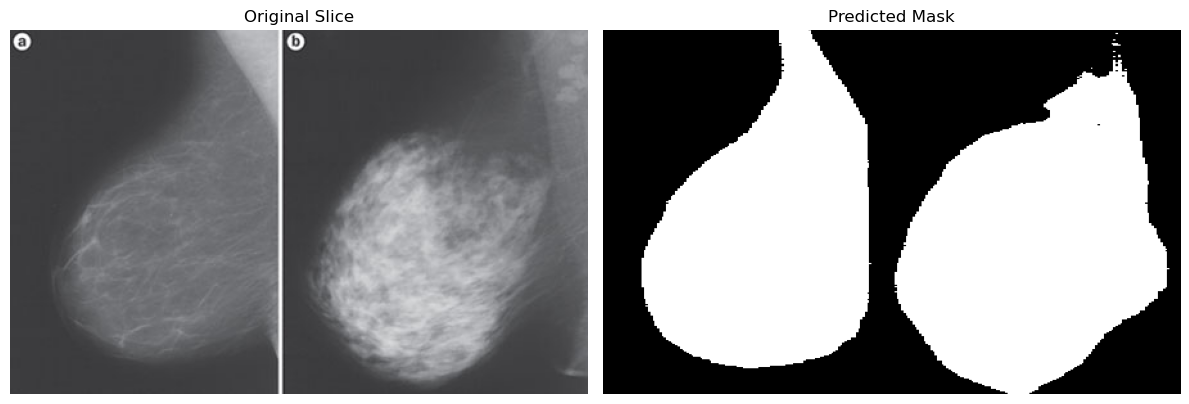

In [ ]:
# Define paths
image_path = 'TEST6.jpeg'  # Replace with the path to your image slice
output_dir = 'predict'  # Directory to save predictions

# Create the output directory if it doesn't exist
Path(output_dir).mkdir(parents=True, exist_ok=True)

# Evaluate the image slice
ori_img, pred_1, Pil_img1 = evaluate_1_slice(image_path, sam_fine_tune)

# Convert the predicted mask to a PIL image
mask_pred_1 = ((pred_1).cpu()).float()
pil_mask1 = Image.fromarray(np.array(mask_pred_1[0], dtype=np.uint8), 'L').resize(Pil_img1.size, resample=Image.NEAREST)

# Save the original image and the predicted mask as PNG
ori_img_filename = os.path.join(output_dir, 'original_image.png')
mask_img_filename = os.path.join(output_dir, 'predicted_mask.png')

Pil_img1.save(ori_img_filename)
pil_mask1.save(mask_img_filename)

print(f"Original image saved to {ori_img_filename}")
print(f"Predicted mask saved to {mask_img_filename}")

# Load and display the original image and the predicted mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original slice
ori_img_display = np.array(Pil_img1)
axes[0].imshow(ori_img_display)
axes[0].set_title("Original Slice")
axes[0].axis('off')

# Display the predicted mask
mask_display = np.array(pil_mask1)
axes[1].imshow(mask_display, cmap='gray')
axes[1].set_title("Predicted Mask")
axes[1].axis('off')

plt.tight_layout()
plt.show()


Original image saved to predict/original_image.png
Predicted mask saved to predict/predicted_mask.png


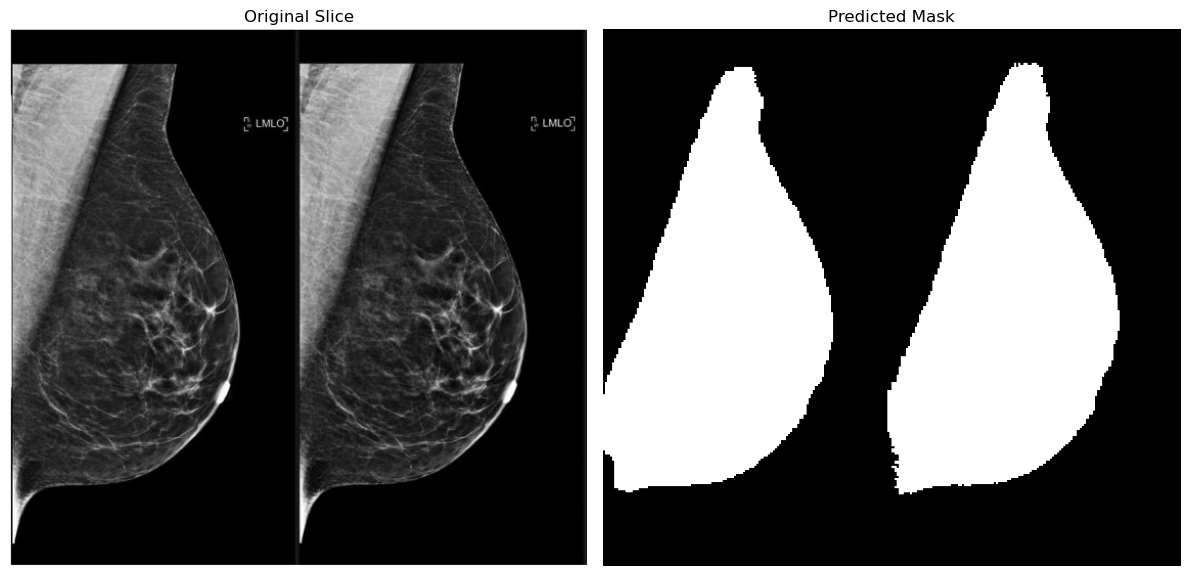

In [ ]:
# Define paths
image_path = 'TEST3.jpg'  # Replace with the path to your image slice
output_dir = 'predict'  # Directory to save predictions

# Create the output directory if it doesn't exist
Path(output_dir).mkdir(parents=True, exist_ok=True)

# Evaluate the image slice
ori_img, pred_1, Pil_img1 = evaluate_1_slice(image_path, sam_fine_tune)

# Convert the predicted mask to a PIL image
mask_pred_1 = ((pred_1).cpu()).float()
pil_mask1 = Image.fromarray(np.array(mask_pred_1[0], dtype=np.uint8), 'L').resize(Pil_img1.size, resample=Image.NEAREST)

# Save the original image and the predicted mask as PNG
ori_img_filename = os.path.join(output_dir, 'original_image.png')
mask_img_filename = os.path.join(output_dir, 'predicted_mask.png')

Pil_img1.save(ori_img_filename)
pil_mask1.save(mask_img_filename)

print(f"Original image saved to {ori_img_filename}")
print(f"Predicted mask saved to {mask_img_filename}")

# Load and display the original image and the predicted mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original slice
ori_img_display = np.array(Pil_img1)
axes[0].imshow(ori_img_display)
axes[0].set_title("Original Slice")
axes[0].axis('off')

# Display the predicted mask
mask_display = np.array(pil_mask1)
axes[1].imshow(mask_display, cmap='gray')
axes[1].set_title("Predicted Mask")
axes[1].axis('off')

plt.tight_layout()
plt.show()


# Test with a entire folder test images
https://universe.roboflow.com/breast-cancer-uuoii/breast-cancer-3r7dj/dataset/1

In [ ]:
from models.sam import SamPredictor, sam_model_registry
from models.sam.utils.transforms import ResizeLongestSide
from skimage.measure import label
from models.sam_LoRa import LoRA_Sam
# Scientific computing
import numpy as np
import os
import imghdr
# Pytorch packages
import torch
from torch import nn
import torch.optim as optim
import torchvision
from torchvision import datasets
# Visualization
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
# Others
from torch.utils.data import DataLoader, Subset
from torch.autograd import Variable
import matplotlib.pyplot as plt
import copy
from utils.dataset import Public_dataset
import torch.nn.functional as F
from torch.nn.functional import one_hot
from pathlib import Path
from tqdm import tqdm
from utils.losses import DiceLoss
from utils.dsc import dice_coeff
import cv2
import monai
from utils.utils import vis_image, inverse_normalize, torch_percentile
from argparse import Namespace
import cfg
import PIL
import torchio as tio
import json

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

arch = "vit_b"  # Change this value as needed
finetune_type = "adapter"
dataset_name = "Breast"  # Assuming you set this if it's dynamic

checkpoint_dir = "checkpoints"
args_path = os.path.join(checkpoint_dir, "args.json")

# Reading the args from the json file
with open(args_path, 'r') as f:
    args_dict = json.load(f)

# Converting dictionary to Namespace
args = Namespace(**args_dict)

# Load the trained model
sam_fine_tune = sam_model_registry[args.arch](args, checkpoint=os.path.join(args.dir_checkpoint, 'checkpoint_best.pth'), num_classes=args.num_cls)
sam_fine_tune = sam_fine_tune.to('cuda').eval()

def evaluate_1_slice(image_path, model):
    """
    Evaluates a single image slice using the provided model.

    Parameters:
    - image_path: Path to the image slice file.
    - model: The model used for evaluation.

    Returns:
    - ori_img: The original image after normalization.
    - pred: The prediction from the model.
    - Pil_img: The PIL image of the original slice.
    """
    # Load the image
    img = Image.open(image_path).convert('RGB')
    Pil_img = img.copy()

    # Resize the image to 1024x1024
    img = transforms.Resize((1024, 1024))(img)

    # Transform the image to a tensor and normalize
    transform_img = transforms.Compose([
        transforms.ToTensor(),
    ])
    img = transform_img(img)
    imgs = torch.unsqueeze(transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(img), 0).cuda()

    # Perform model inference without gradient calculation
    with torch.no_grad():
        # Get image embeddings from the image encoder
        img_emb = model.image_encoder(imgs)

        # Get sparse and dense embeddings from the prompt encoder
        sparse_emb, dense_emb = model.prompt_encoder(
            points=None,
            boxes=None,
            masks=None,
        )

        # Get the prediction from the mask decoder
        pred, _ = model.mask_decoder(
            image_embeddings=img_emb,
            image_pe=model.prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_emb,
            dense_prompt_embeddings=dense_emb,
            multimask_output=True,
        )

        # Get the most likely prediction
        pred = pred.argmax(dim=1)

    # Get the original image after normalization
    ori_img = inverse_normalize(imgs.cpu()[0])

    return ori_img, pred, Pil_img

def process_folder(input_folder, model, output_folder):
    """
    Processes all image slices in a folder and its subfolders using the provided model.

    Parameters:
    - input_folder: Path to the folder containing image slices.
    - model: The model used for evaluation.
    - output_folder: Path to the folder where predictions will be saved.
    """
    # Create the output directory if it doesn't exist
    Path(output_folder).mkdir(parents=True, exist_ok=True)

    # Iterate over all images in the input folder and subfolders
    for root, _, files in os.walk(input_folder):
        for image_name in files:
            image_path = os.path.join(root, image_name)

            # Check if the file is an image
            if imghdr.what(image_path) is None:
                continue

            # Evaluate the image slice
            ori_img, pred, Pil_img = evaluate_1_slice(image_path, model)

            # Convert the predicted mask to a PIL image
            mask_pred = ((pred).cpu()).float()
            mask_pred_resized = cv2.resize(np.array(mask_pred[0]), (Pil_img.size[0], Pil_img.size[1]), interpolation=cv2.INTER_NEAREST)

            # Convert mask to RGB format for visualization
            mask_rgb = np.zeros((mask_pred_resized.shape[0], mask_pred_resized.shape[1], 3), dtype=np.uint8)
            mask_rgb[mask_pred_resized == 1] = [255, 0, 0]  # Red color for mask

            # Convert PIL image to numpy array
            ori_img_np = np.array(Pil_img)

            # Blend the original image and the mask
            blended_img = cv2.addWeighted(ori_img_np, 0.7, mask_rgb, 0.3, 0)

            # Create the corresponding subfolder in the output directory
            relative_path = os.path.relpath(root, input_folder)
            output_subfolder = os.path.join(output_folder, relative_path)
            Path(output_subfolder).mkdir(parents=True, exist_ok=True)

            # Save the blended image
            blended_img_filename = os.path.join(output_subfolder, f'blended_{image_name}')
            cv2.imwrite(blended_img_filename, cv2.cvtColor(blended_img, cv2.COLOR_RGB2BGR))

            print(f"Blended image saved to {blended_img_filename}")

# Define paths
input_folder = 'TEST'  # Replace with the path to your folder containing images
output_folder = 'MEDSAM'  # Directory to save predictions

# Process all images in the folder
process_folder(input_folder, sam_fine_tune, output_folder)


Blended image saved to MEDSAM/./blended_MEKLIT-SEBSIBE0_jpg.rf.1a87eafe59b06a5d0f9fc8a58a5fa0a2.jpg
Blended image saved to MEDSAM/./blended_FRIHIWOTE-ALEMU0_jpg.rf.3be7e505d003e6667b8c75161ca32eff.jpg
Blended image saved to MEDSAM/./blended_zeweditu-taddese2_jpg.rf.d64125d6b5d32ccd4090b89039b62f2b.jpg
Blended image saved to MEDSAM/./blended_LEMELEM-BIRHANU3_jpg.rf.8ce8daed81079b2d8f6f8abd742fa97d.jpg
Blended image saved to MEDSAM/./blended_murga-hussen2_jpg.rf.968c3c676f279ad922dc0ba2b3ae7203.jpg
Blended image saved to MEDSAM/./blended_konjite-tsige1_jpg.rf.c133376fcf171109ea1d29dead30888d.jpg
Blended image saved to MEDSAM/./blended_muluwork-tadesse3_jpg.rf.e8b5f54c6d5c92724fd1bf79b2816d8e.jpg
Blended image saved to MEDSAM/./blended_TEBELTS-GSESE0_jpg.rf.9a96570af44d76be4c539321ceee443a.jpg
Blended image saved to MEDSAM/./blended_KIBNESH-ABIZA1_jpg.rf.32f02db6ab841f56547cf4f737a3d95a.jpg
Blended image saved to MEDSAM/./blended_woinshet-yalew0_jpg.rf.0af8450a323990e75c8790076957aec9.jpg